In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'D:\Downloads\Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

In [3]:
df.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [4]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

region_2                 0.611367
designation              0.288257
taster_twitter_handle    0.240154
taster_name              0.201922
region_1                 0.163475
price                    0.069215
country                  0.000485
province                 0.000485
variety                  0.000008
Unnamed: 0               0.000000
description              0.000000
points                   0.000000
title                    0.000000
winery                   0.000000
dtype: float64

In [16]:
df.isnull().sum().sort_values(ascending=False)

region_2                 79460
designation              37465
taster_twitter_handle    31213
taster_name              26244
region_1                 21247
price                     8996
country                     63
province                    63
variety                      1
Unnamed: 0                   0
description                  0
points                       0
title                        0
winery                       0
dtype: int64

In [13]:
fig = px.histogram(df, x="points")
fig.show()

In [4]:
from sklearn.preprocessing import KBinsDiscretizer


In [6]:
df.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [21]:
train2=df.points.dropna().values
train2

array([87, 87, 87, ..., 90, 90, 90], dtype=int64)

In [7]:
train=df.points.dropna().values.reshape(-1,1)
train

array([[87],
       [87],
       [87],
       ...,
       [90],
       [90],
       [90]], dtype=int64)

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

In [6]:
train = df.points.dropna().values.reshape(-1,1)

In [7]:
# create the discretizer object with strategy uniform and 8 bins
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform') 

# fit the discretizer to the train set
discretizer.fit(train)

# damos o "fit" para ele salvar o mapeamento que ele fez.

# apply the discretisation
df["points_group"] = discretizer.transform(train)*5+80

In [9]:
df["points_group"].value_counts()

85.0    68496
90.0    46629
80.0    12430
95.0     2416
Name: points_group, dtype: int64

In [37]:
df["points_group"].value_counts()

85.0    68496
90.0    46629
80.0    12430
95.0     2416
Name: points_group, dtype: int64

In [10]:
fig = px.histogram(df, x="points_group")
fig.show()

In [19]:
df_price_per_group = df[["country", "points_group","price"]].groupby(["country", "points_group"]).mean()

In [15]:
df_price_per_group.head()

price
country   points_group           
Argentina 80.0          14.421735
          85.0          19.427708
          90.0          50.348745
          95.0          83.363636
Armenia   85.0          14.500000

In [11]:
df.head(1)

Unnamed: 0 country                                        description  \
0           0   Italy  Aromas include tropical fruit, broom, brimston...   

    designation  points  price           province region_1 region_2  \
0  Vulkà Bianco      87    NaN  Sicily & Sardinia     Etna      NaN   

     taster_name taster_twitter_handle                              title  \
0  Kerin O’Keefe          @kerinokeefe  Nicosia 2013 Vulkà Bianco  (Etna)   

       variety   winery  points_group  
0  White Blend  Nicosia          85.0

In [16]:
df_price_per_group=df_price_per_group.reset_index()

In [ ]:
# df_churn_enriq = df_churn_enriq.merge(df_rate_liked_comments, on=["employee","companyAlias"], how="left")

In [20]:
df_price_per_group2=df_price_per_group.merge(df,on=['country','points_group'],how='left',suffixes=['','_per_group'])

In [21]:
df_price_per_group2.head(1)

country  points_group      price  Unnamed: 0  \
0  Argentina          80.0  14.421735        1844   

                                         description designation  points  \
0  Cinnamon and licorice gumdrop and sketchy cher...         NaN      83   

   price_per_group          province region_1 region_2        taster_name  \
0              NaN  Mendoza Province  Mendoza      NaN  Michael Schachner   

  taster_twitter_handle                                           title  \
0           @wineschach  Cascada Peak 2012 Cabernet Sauvignon (Mendoza)   

              variety        winery  
0  Cabernet Sauvignon  Cascada Peak

In [26]:
df.isnull().sum()/df.shape[0]

Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
points_group             0.000000
dtype: float64

In [22]:
df_price_per_group.isnull().sum()/df_price_per_group.shape[0]

price    0.008333
dtype: float64

In [24]:
df_price_per_group2.loc[df_price_per_group2['price_per_group'].isnull(),'price_per_group'] = df_price_per_group2['price']

In [25]:
df_price_per_group2.describe()

points_group          price     Unnamed: 0         points  \
count  129908.000000  129907.000000  129908.000000  129908.000000   
mean       86.501640      35.610250   64984.451889      88.447047   
std         3.311475      21.441403   37518.786765       3.040066   
min        80.000000       9.000000       0.000000      80.000000   
25%        85.000000      24.963617   32491.750000      86.000000   
50%        85.000000      29.088498   64985.500000      88.000000   
75%        90.000000      47.076489   97475.250000      91.000000   
max        95.000000     233.121807  129970.000000     100.000000   

       price_per_group  
count    129907.000000  
mean         35.610250  
std          40.394297  
min           4.000000  
25%          17.312696  
50%          26.000000  
75%          43.000000  
max        3300.000000

In [22]:
df_price_per_group2.describe()

points_group          price     Unnamed: 0         points  \
count  129908.000000  129907.000000  129908.000000  129908.000000   
mean       86.501640      35.610250   64984.451889      88.447047   
std         3.311475      21.441403   37518.786765       3.040066   
min        80.000000       9.000000       0.000000      80.000000   
25%        85.000000      24.963617   32491.750000      86.000000   
50%        85.000000      29.088498   64985.500000      88.000000   
75%        90.000000      47.076489   97475.250000      91.000000   
max        95.000000     233.121807  129970.000000     100.000000   

          price_novo  
count  129907.000000  
mean       35.610250  
std        40.394297  
min         4.000000  
25%        17.312696  
50%        26.000000  
75%        43.000000  
max      3300.000000

In [26]:
df=pd.read_csv(r'D:\Downloads\Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

In [27]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [28]:
df.describe()

Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

<AxesSubplot:xlabel='price'>

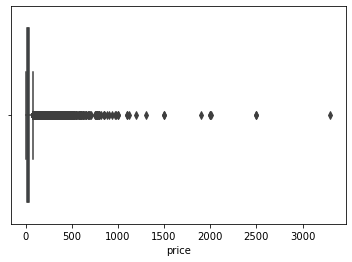

In [32]:
import seaborn as sns
sns.boxplot(data=df,x=df['price'])

In [30]:
df = df[df['price'].notna()]

In [31]:
df.isnull().sum()

Unnamed: 0                   0
country                     59
description                  0
designation              34779
points                       0
price                        0
province                    59
region_1                 19575
region_2                 70683
taster_name              24496
taster_twitter_handle    29416
title                        0
variety                      1
winery                       0
dtype: int64

In [33]:
from scipy import stats
z=np.abs(stats.zscore(df.price))
print(z)

1         0.496401
2         0.520778
3         0.545155
4         0.722456
5         0.496401
            ...   
129966    0.179498
129967    0.966227
129968    0.130744
129969    0.081990
129970    0.350138
Name: price, Length: 120975, dtype: float64


In [34]:
df[z>3].shape

(1177, 14)

In [82]:
fig = px.histogram(df, x="country")
fig.update_layout(xaxis={'categoryorder':'total descending'}) # add only this line
fig.show()

In [47]:
df.country.count()

120916

In [40]:
df.country.value_counts()/df.country.count()*100

US                        44.878263
France                    14.701115
Italy                     13.988223
Spain                      5.436005
Portugal                   4.031725
Chile                      3.652122
Argentina                  3.106289
Austria                    2.314830
Australia                  1.897185
Germany                    1.753283
New Zealand                1.139634
South Africa               1.069337
Israel                     0.404413
Greece                     0.381256
Canada                     0.210063
Hungary                    0.119918
Bulgaria                   0.116610
Romania                    0.099242
Uruguay                    0.090145
Turkey                     0.074432
Georgia                    0.069470
Slovenia                   0.066162
Croatia                    0.058718
Mexico                     0.057891
England                    0.057064
Moldova                    0.048794
Brazil                     0.038870
Lebanon                    0

In [48]:
df.head(1)

Unnamed: 0   country                                        description  \
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   

  designation  points  price province region_1 region_2 taster_name  \
1    Avidagos      87   15.0    Douro      NaN      NaN  Roger Voss   

  taster_twitter_handle                                          title  \
1            @vossroger  Quinta dos Avidagos 2011 Avidagos Red (Douro)   

          variety               winery  
1  Portuguese Red  Quinta dos Avidagos

In [49]:
df = df[df['country']=="US"]

In [53]:
df.province.value_counts()


California           36104
Washington            8583
Oregon                5359
New York              2676
Virginia               770
Idaho                  190
Michigan               111
America                 95
Texas                   93
Colorado                68
New Mexico              45
Arizona                 40
Missouri                33
North Carolina          23
Pennsylvania            18
Ohio                    12
New Jersey               8
Massachusetts            7
Washington-Oregon        7
Illinois                 6
Iowa                     4
Nevada                   4
Vermont                  3
Connecticut              3
Kentucky                 1
Rhode Island             1
Hawaii                   1
Name: province, dtype: int64

In [54]:
df1=df.groupby("province").filter(lambda x: len(x) > 100)
df1.province.value_counts()

California    36104
Washington     8583
Oregon         5359
New York       2676
Virginia        770
Idaho           190
Michigan        111
Name: province, dtype: int64

In [58]:
df2=pd.read_csv(r'D:\Downloads\Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

<AxesSubplot:>

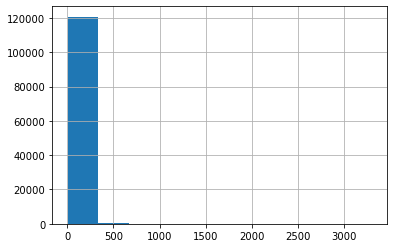

In [59]:
df2['price'].hist()

In [102]:
fig = px.histogram(df, x="price")

fig.show()

In [61]:
from sklearn.preprocessing import PowerTransformer

In [62]:
cols=['price']

In [63]:
# create the power transformer object with method 'box-cox'
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

# apply the transformation to your data
for col in cols:
    df2['{}_box-cox'.format(col)] = boxcox_transformer.fit_transform(df2[cols])

In [64]:
boxcox_transformer.lambdas_

array([-0.2962151])

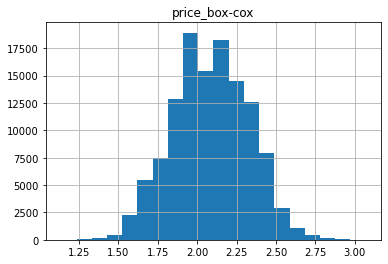

In [65]:
for col in ['price_box-cox']:
    df2[[col]].hist(bins=20)

In [70]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordDetokenizer, WordPunctTokenizer, WhitespaceTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string
import re


In [73]:
snowball_stemmer=SnowballStemmer('portuguese')

In [80]:
df2['description'][0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [74]:
def cleantest(sentence):
    wordtokens=word_tokenize(sentence)
    newwords= [word for word in wordtokens if (word not in string.punctuation and not re.match("[0-9]+",word))]
    cleantokens=newwords[:]
    for token in cleantokens:
        if token in stopwords.words('english'):
            cleantokens.remove(token)
    return ' '.join(cleantokens)

In [83]:
for i in range (0,10): 
    print(cleantest(df2['description'][i]))



Aromas include tropical fruit broom brimstone dried herb The palate n't overly expressive offering unripened apple citrus dried sage alongside brisk acidity
This ripe fruity wine is smooth still structured Firm tannins filled juicy red berry fruits freshened with acidity It 's already drinkable although will certainly better
Tart snappy flavors lime flesh rind dominate Some green pineapple pokes with crisp acidity underscoring flavors The wine all stainless-steel fermented
Pineapple rind lemon pith orange blossom start the aromas The palate a bit opulent notes honey-drizzled guava mango giving way a slightly astringent semidry finish
Much like regular bottling this comes across rather rough tannic rustic earthy herbal characteristics Nonetheless you think pleasantly unfussy country wine it 's a good companion a hearty winter stew
Blackberry raspberry aromas show typical Navarran whiff green herbs in case horseradish In mouth fairly full bodied tomatoey acidity Spicy herbal flavors comp

In [115]:
df=pd.read_csv(r'D:\Downloads\Anexo Certificacao - Data Cleaning e Data Wrangling.csv')

In [96]:
df3=df.groupby(by=["province"]).mean().reset_index()
df3[df3['province']=='Michigan']


province    Unnamed: 0     points      price
11  Michigan  63183.081081  86.153153  32.432432

In [2]:
df=pd.read_csv(r'D:\Downloads\winemag-data-130k-v2.csv')

In [7]:
x=df.groupby(['title']).value_counts().sum()

In [18]:
df['title'].duplicated().sum()/df['title'].shape[0]

0.08564218171746005

In [14]:
df['title'].shape[0]

129971

In [27]:
grouped = df.groupby('title').sum().reset_index()
x=grouped.sort_values('points', ascending=False)
x=x.iloc[:100]
x['points'].mean()

384.47

In [30]:
grouped = df.groupby('title').sum().reset_index()
grouped.iloc[:100].mean()

C:\Users\RAFAEL~1\AppData\Local\Temp/ipykernel_16812/1216572703.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped.iloc[:100].mean()


Unnamed: 0    61630.63
points           95.57
price            25.65
dtype: float64

In [32]:
df.shape

(129971, 14)